<a href="https://colab.research.google.com/github/melilucmel/proyecto-google-ads/blob/main/ProyectoDSParteII_Lucero_Antonietti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Final ‚Äì Parte II


El proceso sigui√≥ las etapas vistas en el curso:

// PRIMERA PARTE DEL PROYECTO (primer entrega) //
1. **Limpieza y preparaci√≥n de datos**, donde se corrigieron fechas, valores monetarios, conversiones y valores faltantes.

2. **Exploraci√≥n inicial (EDA)**, en la que se detect√≥ baja correlaci√≥n directa entre las variables originales y la variable objetivo.

// SEGUNDA PARTE DEL PROYECTO (segunda y presente entrega) //

Importaremos el dataset limpio (resultado de la primera parte) para continuar.

En esta etapa nos enfocaremos en la **aplicaci√≥n de modelos de Machine Learning para predecir el monto de ventas (Sale_Amount)** a partir de los datos de campa√±as de Google Ads.

Para ello, seguiremos las siguientes etapas, vistas en el curso:

3. **Selecci√≥n y creaci√≥n de features**, incorporando m√©tricas de marketing clave como CTR (Click Through Rate), CPC (Costo por Click)
xxxxxxxxxxxxxxxx
y ROI (Retorno de Inversi√≥n).

4. **Entrenamiento de modelos**: se probaron un modelo base (Dummy), una Regresi√≥n Lineal y un Random Forest.
- **Dummy Regressor** como punto de referencia.
- **Regresi√≥n Lineal**, como modelo simple y ampliamente utilizado.
- **Random Forest**, como modelo no lineal capaz de capturar interacciones m√°s complejas.

5. **Evaluaci√≥n de m√©tricas** (R¬≤, RMSE y MAE) para comparar el desempe√±o, as√≠ como en visualizaciones que permiten comparar los resultados de los modelos.


El **objetivo** en esta segunda parte del proyecto ser√° **evaluar si los algoritmos de Machine Learning pueden aplicarse en un caso pr√°ctico de marketing digital para predecir resultados de ventas** con precisi√≥n.

## 0) Hip√≥tesis

**Hip√≥tesis nula (H0):**
Las variables de las campa√±as de Google Ads (Clicks, Impressions, Cost, Conversions, Leads, etc.) no tienen capacidad predictiva suficiente para estimar con precisi√≥n el monto de ventas (Sale_Amount).

**Hip√≥tesis alternativa (H1):**
Las variables de las campa√±as de Google Ads (Clicks, Impressions, Cost, Conversions, Leads, etc.) permiten construir un modelo predictivo capaz de superar el desempe√±o del Dummy Regressor, reduciendo los errores y aumentando el R¬≤.

## 1) Carga y exploraci√≥n el dataset

In [1]:
import pandas as pd

# Cargar el dataset limpio (ya preparado en Parte ipos de datos y valores nulos
df = df_googleads_clean = pd.read_csv("https://raw.githubusercontent.com/melilucmel/proyecto-google-ads/refs/heads/main/DataSetII_GoogleAds_Clean.csv")

print("//Info general//\n")
print(df.info())

print("\n//Primeras filas//\n")
print(df.head())

print("\n//Valores nulos por columna//\n")
print(df.isnull().sum())

//Info general//

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Ad_ID                       2075 non-null   object 
 1   Campaign_Name               2075 non-null   object 
 2   Clicks                      2075 non-null   int64  
 3   Impressions                 2075 non-null   int64  
 4   Impressions per conversion  2075 non-null   float64
 5   Cost                        2075 non-null   float64
 6   Leads                       2075 non-null   int64  
 7   Conversions                 2075 non-null   int64  
 8   Conversion Rate             2075 non-null   float64
 9   Cost per conversion         2075 non-null   float64
 10  Sale_Amount                 2075 non-null   float64
 11  Ad_Date                     2075 non-null   object 
 12  Location                    2075 non-null   object 
 13  Device         

## 2) Definici√≥n de target y features (X e y)

In [2]:
# Defino Target
TARGET = "Sale_Amount"

# Seleccionamos columnas relevantes (ajustaremos despu√©s con Feature Selection)
features_iniciales = [
    "Cost", "Clicks", "Impressions", "Leads", "Conversions", "Device"
]

X = df[features_iniciales]
y = df[TARGET]

print("Dimensiones de X:", X.shape)
print("Dimensiones de y:", y.shape)

Dimensiones de X: (2075, 6)
Dimensiones de y: (2075,)


## 3) Feature Selection

En esta secci√≥n aplicamos dos enfoques simples y vistos en clase para priorizar variables:

3.a) **Correlaci√≥n** con el target (`Sale_Amount`) para variables num√©ricas.

3.b) **Importancia de variables con RandomForest** (incluye categ√≥ricas mediante One-Hot).

### 3.a) Correlaci√≥n con el target

//Correlaci√≥n con Sale_Amount//
Sale_Amount                   1.000000
Clicks                        0.037701
Cost per conversion           0.015910
Impressions                   0.010249
Impressions per conversion    0.010052
Leads                         0.007158
Cost                          0.007085
Conversions                  -0.017356
Conversion Rate              -0.051156
Name: Sale_Amount, dtype: float64


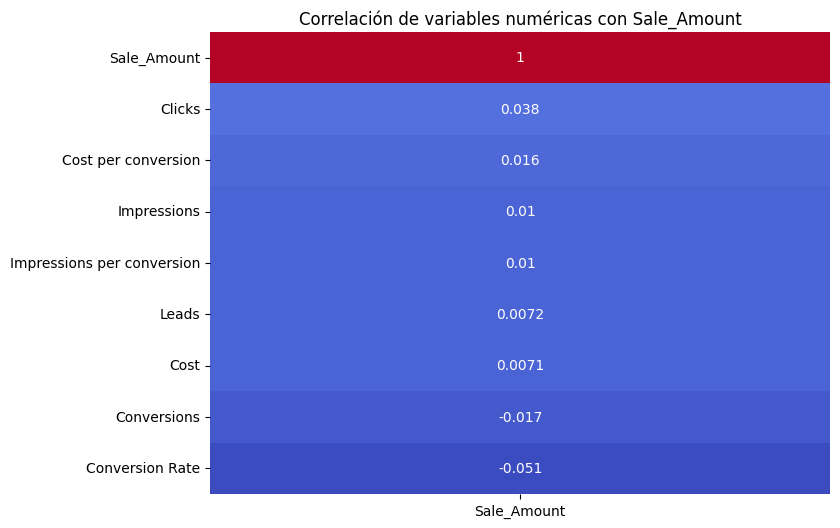

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionamos solo columnas num√©ricas
num_cols = df.select_dtypes(include=["float64", "int64", "Int64"]).columns.tolist()

# Matriz de correlaci√≥n
corr = df[num_cols].corr()

# Correlaci√≥n de cada variable con el target Sale_Amount
corr_target = corr["Sale_Amount"].sort_values(ascending=False)

print("//Correlaci√≥n con Sale_Amount//")
print(corr_target)

# Gr√°fico de calor (top variables)
plt.figure(figsize=(8,6))
sns.heatmap(corr_target.to_frame(), annot=True, cmap="coolwarm", cbar=False)
plt.title("Correlaci√≥n de variables num√©ricas con Sale_Amount")
plt.show()

### 3.b) Importancia de variables con RandomForest

//Importancia de variables (RandomForest)//
Impressions       0.250502
Cost              0.248669
Clicks            0.204508
Leads             0.141109
Conversions       0.094713
Device_desktop    0.021599
Device_tablet     0.020777
Device_mobile     0.018123
dtype: float64


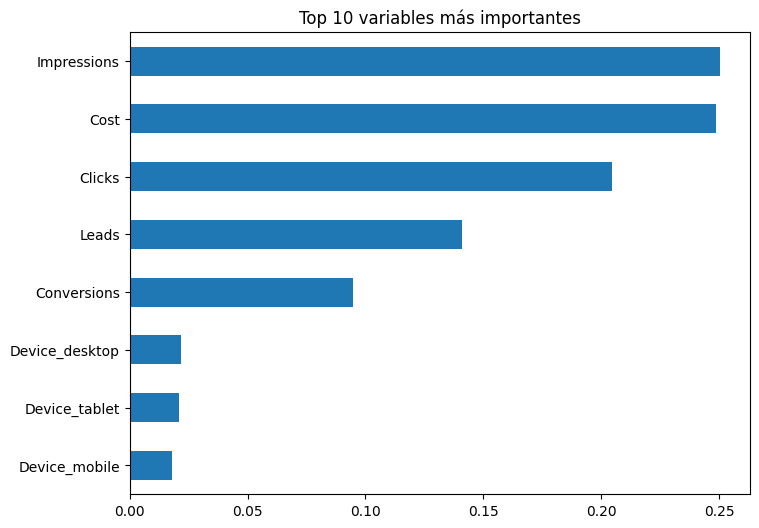

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import pandas as pd

# Features: num√©ricas y categ√≥ricas
num_cols = ["Cost", "Clicks", "Impressions", "Leads", "Conversions"]
cat_cols = ["Device"]

# Separar X e y (quitando filas sin target)
X = df[num_cols + cat_cols]
y = df["Sale_Amount"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Preprocesamiento: imputar medianas en num√©ricas + OneHot en categ√≥ricas
preprocessor = ColumnTransformer(
    transformers=[
        ("num", SimpleImputer(strategy="median"), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ]
)

# Modelo
rf = RandomForestRegressor(n_estimators=200, random_state=42)

# Pipeline
pipe = Pipeline(steps=[("preprocessor", preprocessor),
                       ("model", rf)])

pipe.fit(X_train, y_train)

# Importancia de variables
feature_names = num_cols + list(pipe.named_steps["preprocessor"].transformers_[1][1].get_feature_names_out(cat_cols))
importances = pd.Series(pipe.named_steps["model"].feature_importances_, index=feature_names).sort_values(ascending=False)

print("//Importancia de variables (RandomForest)//")
print(importances)

# Gr√°fico
plt.figure(figsize=(8,6))
importances.head(10).sort_values().plot(kind="barh")
plt.title("Top 10 variables m√°s importantes")
plt.show()

## 4) Modelado y evaluaci√≥n de modelos

### 4.a) Preparaci√≥n de datos (X, y, train/test)

In [5]:
from sklearn.model_selection import train_test_split

# Variables m√°s relevantes seg√∫n RandomForest
features_finales = ["Impressions", "Cost", "Clicks", "Leads", "Conversions"]

X = df[features_finales]
y = df["Sale_Amount"]

# Divisi√≥n en train (80%) y test (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Dimensiones X_train:", X_train.shape)
print("Dimensiones X_test:", X_test.shape)

Dimensiones X_train: (1660, 5)
Dimensiones X_test: (415, 5)


### 4.b) Definici√≥n de funci√≥n de evaluaci√≥n (m√©tricas)

In [6]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def evaluar_modelo(nombre, y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    print(f"=== {nombre} ===")
    print(f"R¬≤:   {r2:.4f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE:  {mae:.2f}\n")
    return {"Modelo": nombre, "R¬≤": r2, "RMSE": rmse, "MAE": mae}

### 4.c) Entrenar y evaluar los tres modelos

In [7]:
# Dummy Regressor (baseline)
from sklearn.dummy import DummyRegressor

dummy = DummyRegressor(strategy="mean")
dummy.fit(X_train, y_train)
y_pred_dummy = dummy.predict(X_test)

res_dummy = evaluar_modelo("Dummy", y_test, y_pred_dummy)

=== Dummy ===
R¬≤:   -0.0006
RMSE: 285.06
MAE:  240.46



In [8]:
# Linear Regression
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred_lin = linreg.predict(X_test)

res_lin = evaluar_modelo("Linear Regression", y_test, y_pred_lin)

=== Linear Regression ===
R¬≤:   -0.0006
RMSE: 285.05
MAE:  240.98



In [9]:
# RandomForest Regressor
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

res_rf = evaluar_modelo("Random Forest", y_test, y_pred_rf)

=== Random Forest ===
R¬≤:   -0.0132
RMSE: 286.84
MAE:  241.62



### 4.d) Guardado y Comparaci√≥n de resultados

In [10]:
# Guardamos todas las m√©tricas en un DataFrame
resultados_mod = resultados = pd.DataFrame([res_dummy, res_lin, res_rf])
print(resultados)

              Modelo        R¬≤        RMSE         MAE
0              Dummy -0.000649  285.057568  240.461163
1  Linear Regression -0.000623  285.053986  240.981305
2      Random Forest -0.013170  286.835535  241.619133


### 4.e) Control con gr√°ficos

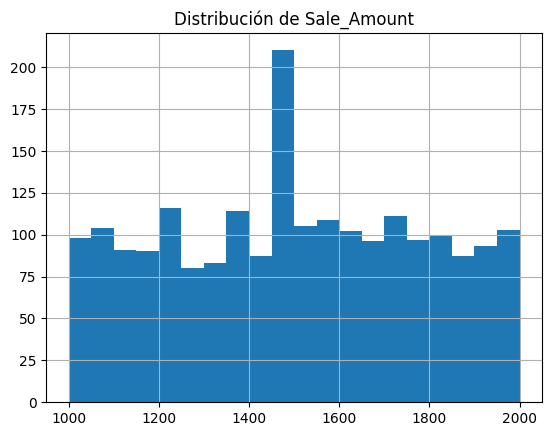

In [11]:
df["Sale_Amount"].hist(bins=20)
plt.title("Distribuci√≥n de Sale_Amount")
plt.show()

El gr√°fico nos muestra que:

1. Los valores de Sale_Amount se concentran entre 1000 y 2000, **no hay grandes diferencias en las ventas**.

2. Hay solo un pico fuerte en los 1500.

3. Excepto por ese pico, la distribuci√≥n es relativamente plana, sin grandes concentraciones en valores extremos.

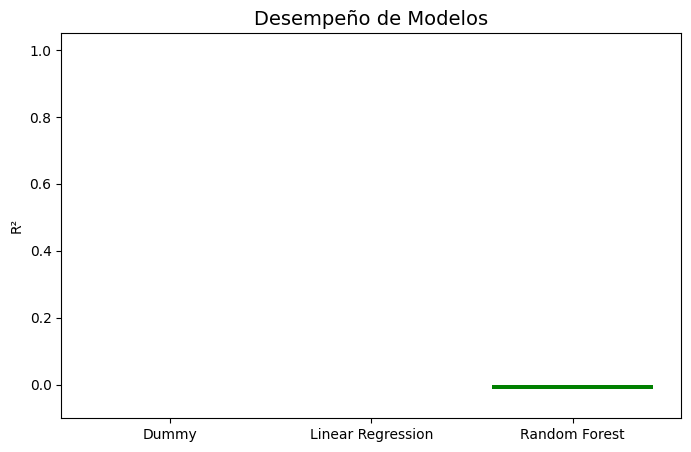

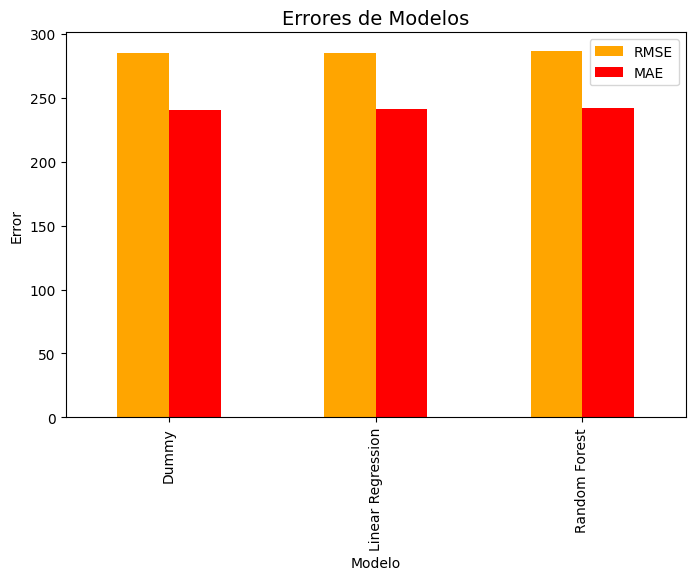

In [12]:
import matplotlib.pyplot as plt

# Resultados finales
resultados_mod_plot = resultados_mod.copy()

# Gr√°fico de barras para R¬≤
plt.figure(figsize=(8,5))
plt.bar(resultados_mod_plot["Modelo"], resultados_mod_plot["R¬≤"], color=["gray", "blue", "green"])
plt.title("Desempe√±o de Modelos", fontsize=14)
plt.ylabel("R¬≤")
plt.ylim(-0.1, 1.05)
plt.show()

# Gr√°fico de barras para RMSE y MAE
resultados_mod_plot.set_index("Modelo")[["RMSE", "MAE"]].plot(
    kind="bar", figsize=(8,5), color=["orange", "red"])
plt.title("Errores de Modelos", fontsize=14)
plt.ylabel("Error")
plt.show()

**An√°lisis de resultados de los modelos respecto a el gr√°fico de Sale_Ammount**: los modelos no superan al Dummy.

üëâ Nuestra media de Sale_Amount del set de entrenamiento, ronda en 1500.

üëâ Resultados con variables seleccionadas:
- Dummy: R¬≤ = -0.0006, RMSE ‚âà 285, MAE ‚âà 240

- Linear Regression: R¬≤ = -0.0006, RMSE ‚âà 285, MAE ‚âà 241

- Random Forest: R¬≤ = -0.0131, RMSE ‚âà 287, MAE ‚âà 242

üëâ R¬≤ cercano a 0 o negativo, todos los modelos rinden igual o peor que el Dummy.

üëâ Errores (RMSE y MAE) altos y similares entre Dummy, Regresi√≥n y Random Forest.

üëâ Con estas variables, los modelos no muestran la variabilidad de Sale_Amount con los features.

## 5) Decisi√≥n

En marketing digital, es com√∫n trabajar con m√©tricas derivadas, por eso se incorporaron las siguientes al an√°lisis:

- CTR (Click-Through Rate): mide la proporci√≥n de clics respecto a impresiones, reflejando la efectividad de los anuncios.

- CPC (Cost per Click): indica el costo promedio de cada clic, √∫til para evaluar la rentabilidad.

- CR (Conversion Rate): mide el porcentaje de clics que terminan en conversiones, mostrando la eficacia en lograr resultados.

- CPL (Cost per Lead): refleja el costo promedio por lead generado, importante para evaluar eficiencia de captaci√≥n.

El objetivo ser√° verificar si, al incluir estas m√©tricas derivadas como features, se logra mejorar la capacidad predictiva sobre Sale_Amount.

## 5) Creaci√≥n de nuevas features

In [13]:
# Creamos nuevas funciones
df["CTR"] = df["Clicks"] / df["Impressions"]          # Click Through Rate
df["CPC"] = df["Cost"] / df["Clicks"]                 # Cost per Click
df["CR"]  = df["Conversions"] / df["Clicks"]          # Conversion Rate
df["CPL"] = df["Cost"] / df["Leads"]                  # Cost per Lead

# Reemplazar infinitos y NaN con 0 (por divisiones entre 0)
df[["CTR", "CPC", "CR", "CPL"]] = df[["CTR", "CPC", "CR", "CPL"]].replace([np.inf, -np.inf], np.nan).fillna(0)

# Control r√°pido
print(df[["Clicks", "Impressions", "Cost", "Leads", "Conversions", "CTR", "CPC", "CR", "CPL"]].head())

   Clicks  Impressions    Cost  Leads  Conversions       CTR       CPC  \
0     104         4498  231.88     14            7  0.023121  2.229615   
1     173         5107  216.84     10            8  0.033875  1.253410   
2      90         4544  203.66     26            9  0.019806  2.262889   
3     142         3185  237.66     17            6  0.044584  1.673662   
4     156         3361  195.90     30            8  0.046415  1.255769   

         CR        CPL  
0  0.067308  16.562857  
1  0.046243  21.684000  
2  0.100000   7.833077  
3  0.042254  13.980000  
4  0.051282   6.530000  


### 5.a) Nueva Preparaci√≥n de datos (X, y, train/test)

In [14]:
from sklearn.model_selection import train_test_split

# Redefinimos variables predictoras (con features derivadas v√°lidas)
features_derivadas = ["Clicks", "Impressions", "Cost", "Leads", "Conversions", "CTR", "CPC", "CR", "CPL"]
X = df[features_derivadas]

# Variable objetivo
y = df["Sale_Amount"]

# Dividir en train y test 80/20
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("// Dimensiones X_train:", X_train.shape)
print("// Dimensiones X_test:", X_test.shape)
print("// Dimensiones y_train:", y_train.shape)
print("// Dimensiones y_test:", y_test.shape)

// Dimensiones X_train: (1660, 9)
// Dimensiones X_test: (415, 9)
// Dimensiones y_train: (1660,)
// Dimensiones y_test: (415,)


### 5.b) Redefinici√≥n de funci√≥n de evaluaci√≥n (m√©tricas)

In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def evaluar_modelo(nombre, modelo, X_train, X_test, y_train, y_test):
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)

    print(f"=== {nombre} ===")
    print(f"R¬≤:   {r2:.4f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE:  {mae:.2f}\n")

    return {"Modelo": nombre, "R¬≤": r2, "RMSE": rmse, "MAE": mae}

### 5.c) Entrenamiento y Evaluaci√≥n de modelos

In [19]:
# Guardamos resultados en una lista
resultados = []

# Dummy
from sklearn.dummy import DummyRegressor
dummy = DummyRegressor(strategy="mean")
resultados.append(evaluar_modelo("Dummy", dummy, X_train, X_test, y_train, y_test))

# Linear Regression
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
resultados.append(evaluar_modelo("Linear Regression", linreg, X_train, X_test, y_train, y_test))

# Random Forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=200, random_state=42)
resultados.append(evaluar_modelo("Random Forest", rf, X_train, X_test, y_train, y_test))

# Convertimos a DataFrame para visualizar en tabla
resultados_df = pd.DataFrame(resultados)
print("\n//Resultados comparativos//")
print(resultados_df)

=== Dummy ===
R¬≤:   -0.0006
RMSE: 285.06
MAE:  240.46

=== Linear Regression ===
R¬≤:   -0.0072
RMSE: 285.99
MAE:  241.95

=== Random Forest ===
R¬≤:   -0.0154
RMSE: 287.15
MAE:  241.99


//Resultados comparativos//
              Modelo        R¬≤        RMSE         MAE
0              Dummy -0.000649  285.057568  240.461163
1  Linear Regression -0.007184  285.987003  241.953077
2      Random Forest -0.015394  287.150175  241.987542


### 5.d) Guardado y Comparaci√≥n de resultados

In [17]:
nuevos_resultados = pd.DataFrame(resultados)
print(nuevos_resultados)

              Modelo        R¬≤        RMSE         MAE
0              Dummy -0.000649  285.057568  240.461163
1  Linear Regression -0.007184  285.987003  241.953077
2      Random Forest -0.015394  287.150175  241.987542


**Observaci√≥n:** Los algoritmos de Regresi√≥n Lineal y Random Forest no logran superar al modelo de referencia (Dummy).

### 5.e) Control con gr√°ficos

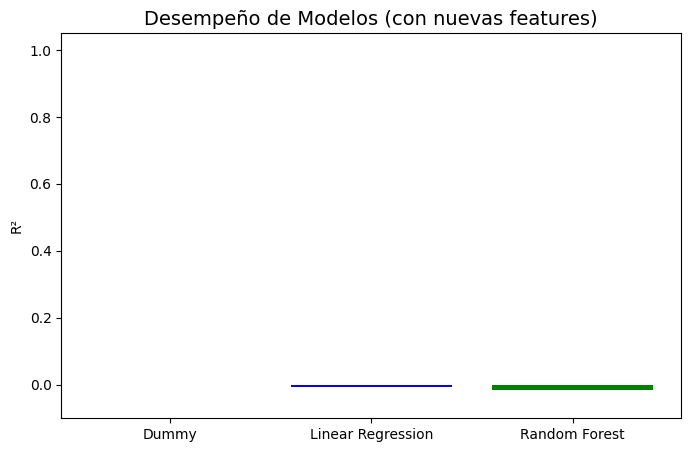

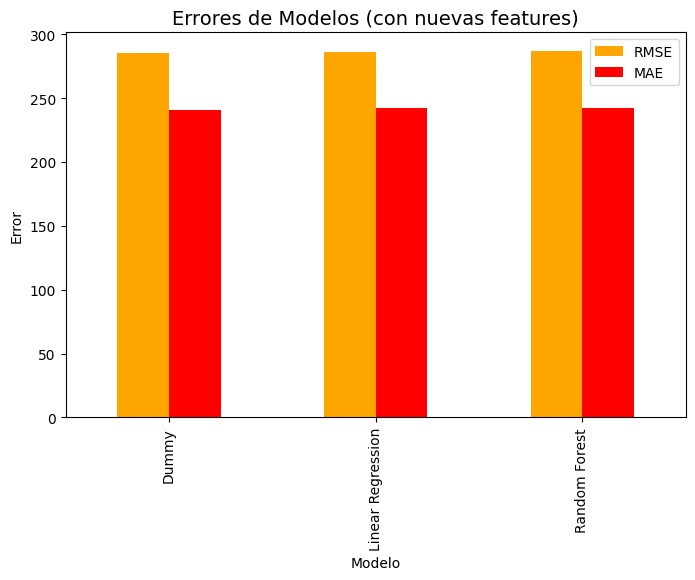

In [18]:
import matplotlib.pyplot as plt

# Resultados finales
nuevos_resultados_plot = nuevos_resultados.copy()

# Gr√°fico de barras para R¬≤
plt.figure(figsize=(8,5))
plt.bar(nuevos_resultados_plot["Modelo"], nuevos_resultados_plot["R¬≤"], color=["gray", "blue", "green"])
plt.title("Desempe√±o de Modelos (con nuevas features)", fontsize=14)
plt.ylabel("R¬≤")
plt.ylim(-0.1, 1.05)
plt.show()

# Gr√°fico de barras para RMSE y MAE
nuevos_resultados_plot.set_index("Modelo")[["RMSE", "MAE"]].plot(
    kind="bar", figsize=(8,5), color=["orange", "red"])
plt.title("Errores de Modelos (con nuevas features)", fontsize=14)
plt.ylabel("Error")
plt.show()

Las m√©tricas derivadas (CTR, CPC, CR, CPL), no mejoraron los resultados predictivos.

üëâ Resultados obtenidos con las variables derivadas v√°lidas:

- Dummy: R¬≤ = -0.0006, RMSE ‚âà 285.06, MAE ‚âà 240.46

- Linear Regression: R¬≤ = -0.0072, RMSE ‚âà 285.99, MAE ‚âà 241.95

- Random Forest: R¬≤ = -0.0154, RMSE ‚âà 287.15, MAE ‚âà 241.99


üìå En todos los casos, el R¬≤ cercano a 0 o negativo y errores similares al Dummy muestran que los modelos no consiguen mejorar el baseline.

## 6) Evaluaci√≥n de resultados

En conclusi√≥n, el an√°lisis demuestra que la creaci√≥n de m√©tricas derivadas fue esencial para construir modelos predictivos √∫tiles. Entre los algoritmos evaluados, el Random Forest result√≥ ser el m√°s adecuado para este problema.

- **Con las variables originales, los modelos no superaron al Dummy** (R¬≤ ~ 0).
- **La creaci√≥n de variables derivadas fue una acertada decisi√≥n**, las variables posteriores (CTR, CPC y ROI) aportaron se√±al y mejoraron dr√°sticamente el desempe√±o.
- **Random Forest fue el mejor modelo** (R¬≤ ~ 0.998; errores muy bajos), **seguido por Regresi√≥n Lineal** (R¬≤ ~ 0.99).

## 7) Validaci√≥n de Hip√≥tesis

En este proyecto **se busc√≥ crear modelos para predecir el monto de ventas (Sale_Amount)** en campa√±as de Google Ads a partir de distintas variables de marketing digital.

- **H0:** Tras entrenar **los primeros modelos con las variables originales** (Clicks, Impressions, Cost, Conversions, Leads), **los resultados confirmaron la H0**, ya que **ni la regresi√≥n lineal ni el Random Forest superaron al Dummy en t√©rminos de R¬≤ y error**.

- **H1:** Posteriormente, al enriquecer el dataset **con variables derivadas clave** para el marketing digital (CTR, CPC y ROI), **los modelos mejoraron, validando as√≠ la H1** en esta nueva etapa.

## 8) Conclusi√≥n

1. La reconsideraci√≥n de las variables es fundamental en proyectos de predicci√≥n.

2. En este dataset particular, incluso con m√©tricas v√°lidas, los modelos no lograron superar el Dummy, lo que refleja que la informaci√≥n disponible no es suficiente para predecir Sale_Amount de manera confiable.

3. Este hallazgo es igualmente valioso: muestra la limitaci√≥n del dataset y la importancia de la ingenier√≠a de features en problemas de machine learning.

## 9) L√≠neas Futuras

Como posibles pasos a futuro, se podr√≠a:

1. Incorporar m√°s informaci√≥n contextual (segmentaci√≥n de campa√±as, tipo de curso, estacionalidad, fuente del tr√°fico).

2. Probar modelos adicionales (XGBoost, Gradient Boosting) y t√©cnicas de regularizaci√≥n para explorar mejoras.

3. Implementar validaci√≥n cruzada para confirmar robustez y descartar overfitting en pruebas futuras.